In [197]:
%load_ext autoreload

%autoreload 2
import sys
import corner
import numpy as np
import matplotlib.pyplot as plt
import scipy
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import covariance as covar
import utils
import pandas as pd
import abundance as cl_count
import forecast
import emcee
from lnlikelihood import lnLikelihood
import pyccl as ccl
import edit
import h5py, glob
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [208]:
s

NameError: name 's' is not defined

In [198]:
%load_ext autoreload
%autoreload 2
import getdist
from getdist import plots, MCSamples

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


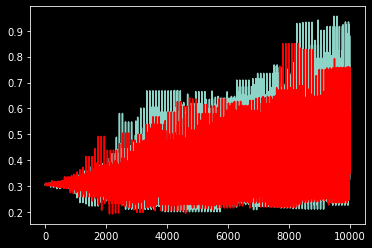

In [207]:
unbinnedSSC = np.load('mcmc_chains_unbinned_SSC.npy')
unbinned = np.load('mcmc_chains_unbinned_.npy')
plt.plot(unbinnedSSC[:,0])
plt.plot(unbinned[:,0], 'r')

In [200]:
errOmSSC, errs8SSC = np.std(unbinnedSSC[8000:], axis=0)
errOmSSC, errs8SSC

(0.13682152521203866, 0.08199021489092842)

In [201]:
errOmnoSSC, errs8noSSC = np.std(unbinned[8000:], axis=0)
errOmnoSSC, errs8noSSC

(0.11409852643241523, 0.07812957937298654)

In [202]:
100*(1-errOmnoSSC/errOmSSC)

16.607766025417813

In [203]:
100*(1-errs8noSSC/errs8SSC)

4.708653981548516

In [204]:
ndim=2
names = ['1', '2',]
labels =  [r'\Omega_m', r'\sigma_8']
settings={'mult_bias_correction_order':0,'smooth_scale_2D':6, 'smooth_scale_1D':4, 'boundary_correction_order':0}
samples1 = MCSamples(samples=unbinnedSSC[8000:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='unbinnedSSC')
samples2 = MCSamples(samples=unbinned[8000:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='unbinned')

Removed no burn in
Removed no burn in


<Figure size 504x504 with 0 Axes>

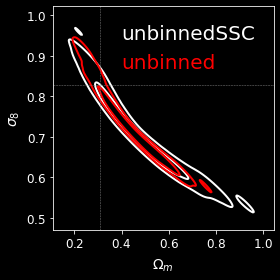

In [205]:
fig=plt.figure(figsize=(7,7))
plt.style.use('dark_background')
#g = plots.get_subplot_plotter(subplot_size=5)
g = plots.get_single_plotter(width_inch=4,ratio = 1)
g.settings.legend_fontsize = 20
g.settings.axes_fontsize=12
g.plot_2d([ samples1, samples2,], names, 
          colors=['white', 'red'], filled=False, ls='-',lws=2,)
g.add_x_marker(0.30711)
g.add_y_marker(.8288,)
g.add_legend(['unbinnedSSC', 'unbinned'], colored_text=True);
plt.savefig('unbinnedSSC.png', dpi = 300)

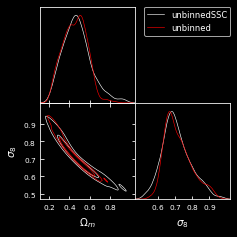

In [184]:
g = plots.get_subplot_plotter(subplot_size=1.7)
g.triangle_plot([ samples1, samples2,], filled=[False,False,True,False,True], colors=['white', 'red'],
                       fine_bins = 1,  marker_args = {'linewidth':2}, contour_colors = ['white', 'red', 'grey', 'green', 'grey' ])
plt.savefig('unbinnedSSC.png', dpi = 300)